# Parallel tempering of 1-D particle
## Introduction
For molecular simulations using Monte Carlo schemes, there would always be an incomplete sampling issue when the temperature is low. Parallel tempering is an MC-based method that has been invented to have better sampling results of a system that has many local minima.
The basic idea is, for $NVT$ ensembles which have the same $NV$ but under different temperature $T$, we define the "extended" ensemble which is the combination of these ensembles. Thus, the partition function could be expressed as
$$
Z_\text{extended} = \prod_{i=1}^n Z_{NVT_i}
$$
At that time, we introduce a special Monte Carlo move of the exchange of temperature between two ensembles.
For example, swap the temperature of $i$th ensemble and $j$th ensemble
$$
(x_i, T_i)(x_j, T_j) \rightarrow (x_i, T_j)(x_j, T_i)
$$
It is easy to derive that the probability of acceptance for the above exchange move is equal to
$$
\text{acc} = \exp[(\beta_i - \beta_j)(U(x_i) - U(x_j))]
$$
Note that this exchange is also called Hamiltonian swapping.

For example, the pesudo-code for parallel tempering in `main.f90` is
```fortran
! main program
do i = 1, n_iter
    ! perform MC move for each ensemble separately
    do j = 1, total_replica
        !!! MC move !!!
    end do

    ! perform Hamitonian swapping every n_exchage
    if (mod(i, n_exchage) .eq. 0) then
        !!! exchange temperature !!!
    end if
    
    ! do record every n_record
    if (mod(i, n_record) .eq. 0) then
        !!! record data !!!
    end if
end do
```
And the 1-D potential energy function is defined as
$$
U(x) = 5\cos\left(\frac{\pi}{10}x\right) + 1
$$
with the boundary condition
$$
x_\text{min} = 0.0, x_\text{max} = 80.0
$$

## Step 0: import essential packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Step 1: run the main program
The main replica program is written in Fortran, and could be compiled and run with `gfortran` installed. You can costume the parameters in `main.f90`. For example, you can change the number of total replica (default is 4).

In [2]:
# if you already run the program, please SKIP this cell!
# data would be generated as tmp.dat
!make run

make
make[1]: Entering directory '/home/shiroha/Documents/cuhksz/BIM3010/trial/parallel_tempering'
make[1]: 'parallel_tempering' is up to date.
make[1]: Leaving directory '/home/shiroha/Documents/cuhksz/BIM3010/trial/parallel_tempering'
./parallel_tempering


## Step 2: load data into numpy arrays

In [3]:
dat  = np.loadtxt("coords.dat")
info = np.loadtxt("info.dat")
temp = np.loadtxt("temp.dat")
print("There are {} recorded datapoints and {} replicas.".format(dat.shape[0], dat.shape[1]))

There are 1000000 recorded datapoints and 4 replicas.


## Step 3: plot data population

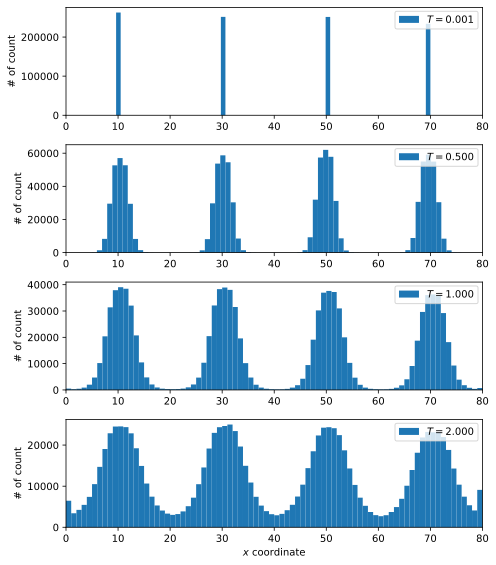

In [4]:
total_replica = dat.shape[1]
fig, axes = plt.subplots(total_replica, 1, figsize=(7, 8))
for i in range(total_replica):
    axes[i].hist(dat[:, i], int(info[2]))
    axes[i].set_xlim(info[0], info[1])
    axes[i].set_ylabel("# of count")
    axes[i].legend(["$T = {:.3f}$".format(temp[i])], loc=[0.79, 0.8])
    if i==total_replica-1:
        axes[i].set_xlabel("$x$ coordinate")
plt.tight_layout()

## References
* Frenkel, Daan, and Berend Smit. Understanding molecular simulation: from algorithms to applications. Vol. 1. Elsevier, 2001.